## Plot arrows in Julia

In this notebook, we will see how to plot arrows useful to visualize velocity fields.

Let us consider the following velocity field: 
$$\begin{equation} \boldsymbol{v} = -Cx \boldsymbol{e}_x +  Cy \boldsymbol{e}_y \end{equation}$$

with $C$ an arbitrary positive constant. (This is the flow about a stagnation point)

From that we can get the equation of a streamline:

$$\frac{dy}{dx} = \frac{v}{u} = \frac{Cy}{-Cx} = -\frac{y}{x} $$

Using a separation of variables, we can find that a streamline is the set of points $\{(x,y)\}$ which verify the following relation $xy = K$

We can plot a few streamlines by choosing different values of $K$

To do so, let us load the library `Plots`

In [1]:
using Plots

┌ Info: Recompiling stale cache file /home/mathow/.julia/compiled/v1.1/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1184


Each streamline is defined by a specific value of the constant $K$. 

We can explicitly express $y$ as a function of $x$ :

$y = \frac{K}{x}$

Define a range of x values

In [2]:
x = 0.1:0.01:1.5

0.1:0.01:1.5

Define a range of K values

In [3]:
Krange = -6:2.0:6.0

-6.0:2.0:6.0

Plot streamlines for different values of K

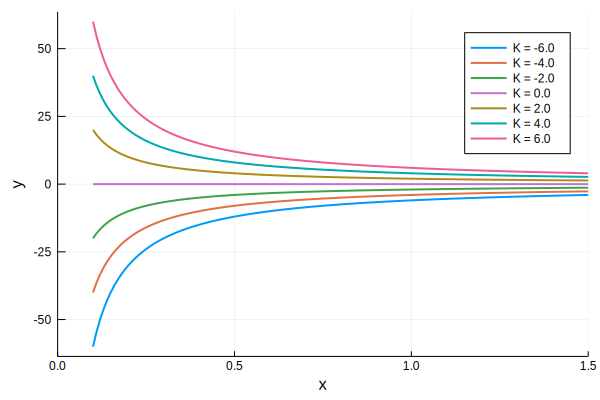

In [4]:
plt = plot(legend = true, xlim = (0, x[end]), xlabel = "x", ylabel = "y")

for K in Krange
    plot!(x, K./x, label = "K = "*string(K), linewidth = 2)    
end

plt

Let's add to this plot some vector velocity for some locations. We should set a value to the constant $C$  defined in $\boldsymbol{v}$.

We can use the function `quiver` from Plots to plot arrows

In [5]:
?quiver

search: quiver quiver!



```
quiver(x,y,quiver=(u,v))
quiver!(x,y,quiver=(u,v))
```

Make a quiver (vector field) plot. The `i`th vector extends from `(x[i],y[i])` to `(x[i] + u[i], y[i] + v[i])`.

# Example

```julia-repl
julia> quiver([1,2,3],[3,2,1],quiver=([1,1,1],[1,2,3]))
```


Let's start with a simple example

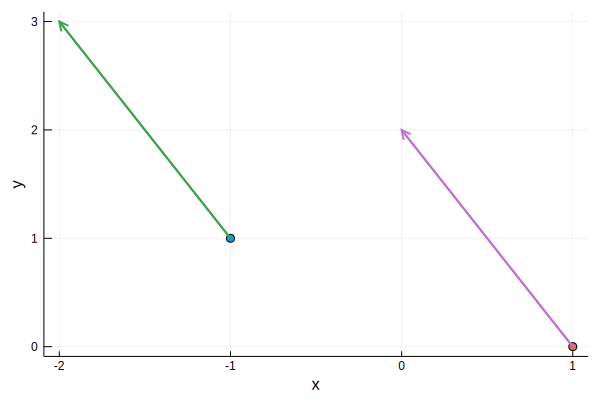

In [10]:
# Coordinates of the points
xcoord = [-1 1]
ycoord = [ 1 0]

# Components of velocity at points
ux = [-1 1]
uy = [2 1]

# Plot
scatter(xcoord, ycoord)
quiver!(xcoord, ycoord, quiver = (ux, uy), legend =false, xlabel = "x", ylabel = "y", linewidth = 2)

Now, we can use `quiver` to plot the velocity field above along a few points on a streamline

In [7]:
C = 0.1

u(s) = -C*s
v(s) =  C*s

v (generic function with 1 method)

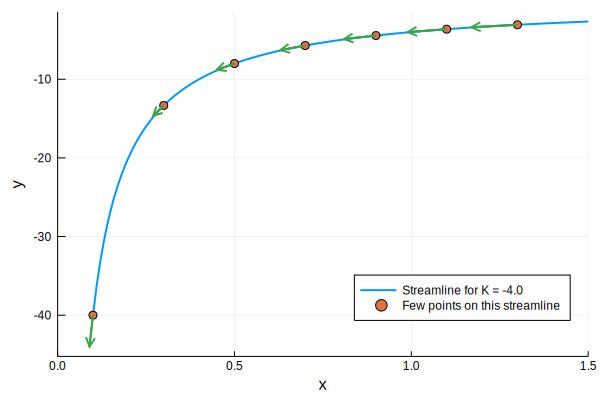

In [8]:
xpoint = 0.1:0.2:1.3

plt2 = plot(legend = true, xlim = (0, x[end]), xlabel = "x", ylabel = "y")

K =  Krange[2]


# Plot the streamline
plot!(x, K./x, linewidth =2, label = "Streamline for K = "*string(K))

# Plot a few points on this streamline with orange dots
scatter!(xpoint, K./xpoint, label = "Few points on this streamline", linewidth = 2, legend = :bottomright)

# Plot the velocity field at these points
quiver!(xpoint, K./xpoint, quiver = (u.(xpoint), v.(K./xpoint)), linewidth = 2)

plt2